<a href="https://colab.research.google.com/github/AngelikaBaloy/scratchpad/blob/main/DS3001_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
2.5
```



In [1]:
! git clone https://github.com/AngelikaBaloy/scratchpad
%run ./scratchpad/get_data.py


Cloning into 'scratchpad'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 61 (delta 17), reused 7 (delta 7), pack-reused 34 (from 1)
Receiving objects: 100% (61/61), 748.22 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Download complete
Extracting data files...
Data extracted


KNN again


In [2]:
import numpy as np

In [3]:
import pandas as pd

df= pd.read_csv("/content/data/diabetes-dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
np.sum(df.isna(), axis=0)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
y = df['Outcome']

vars = ['Glucose', 'BMI', 'Insulin']

x = df.loc[:, vars]
x.describe()

,Glucose,BMI,Insulin
count,2000.000000,2000.000000,2000.000000
mean,121.182500,32.193000,80.254000
std,32.068636,8.149901,111.180534
min,0.000000,0.000000,0.000000
25%,99.000000,27.375000,0.000000
50%,117.000000,32.300000,40.000000
75%,141.000000,36.800000,130.000000
max,199.000000,80.600000,744.000000


In [ ]:
def maxmin(x):
  u = (x-min(x))/(max(x)-min(x))
  return u

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
u = x.apply(maxmin)
u.describe()

,Glucose,BMI,Insulin
count,2000.000000,2000.000000,2000.000000
mean,0.608957,0.399417,0.107868
std,0.161149,0.101115,0.149436
min,0.000000,0.000000,0.000000
25%,0.497487,0.339640,0.000000
50%,0.587940,0.400744,0.053763
75%,0.708543,0.456576,0.174731
max,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

u_train, u_test, y_train, y_test = train_test_split(u,y, test_size=.2, random_state=100)

k_grid = [(2*k+1) for k in range(100)] # want odd to eliminate possiblility of ties

for k in k_grid:
  acc = []
  model = KNeighborsClassifier(n_neighbors=k)
  model = model.fit(u_train, y_train)
  y_hat = model.predict(u_test)
  acc.append(model.score(u_test, y_test))


In [ ]:
import seaborn as sns

sns.lineplot(x=k_grid, y=acc)

KNN Regression
- mean square error & residuals as substitute for confusion matrices

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

u_train, u_test, y_train, y_test = train_test_split(u,y, test_size=.2, random_state=100)

k_grid = [(2*k+1) for k in range(100)] # want odd to eliminate possiblility of ties

for k in k_grid:
  loss = [] # not acc
  model = KNeighborsRegressor(n_neighbors=k)
  model = model.fit(u_train, y_train)
  y_hat = model.predict(u_test)
  loss.append(mse(u_test, y_test))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = np.asarray(y)
y_hat = np.asarray(y_hat)

# Perfect prediction line
lo = np.min([y.min(), y_hat.min()])
hi = np.max([y.max(), y_hat.max()])
plt.plot([lo, hi], [lo, hi], linestyle='--', label='y = ŷ')

# Data points
plt.scatter(y_hat, y_test, label='(ŷ, y)')

# Residuals: vertical lines y_i - y_hat_i
for a, b in zip(y_hat, y_test):
    plt.vlines(a, a, b, color='red', linewidth=.5)

plt.xlabel("Predicted ŷ")
plt.ylabel("Actual y")
plt.title("Residuals (r = y − ŷ)")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
def mse(y_test,y_hat):
    mse = np.sum( (y_test - y_hat) ** 2 )/len(y_test)
    return mse
# or from sklearn.metrics import mean_squared_error

Linear regression

2.10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/craiglist_cville_cars_long.csv')
df['age'] = np.max(df['year']) - df['year']
df.head()

,Unnamed: 0,title,price,year,link,brand,age,log_price,log_age,title.1,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,0,2005 hyundai elantra,1200,2005.0,https://charlottesville.craigslist.org/cto/d/a...,missing,16.0,7.090077,2.995732,title,2005,fair,4 cylinders,fwd,gas,232450,silver,manual,sedan,‘05 Elantra runs good but did not pass inspect...
1,1,2007 f250 king ranch,17500,2007.0,https://charlottesville.craigslist.org/cto/d/w...,missing,14.0,9.769956,2.890372,title,2007,good,8 cylinders,4wd,diesel,148086,missing,automatic,pickup,"6.0 diesel, bulletproofed, just replaced trans..."
2,2,1997 dodge 2500 4x4 cummins,9500,1997.0,https://charlottesville.craigslist.org/cto/d/l...,dodge,24.0,9.159047,3.332205,title,1997,fair,6 cylinders,4wd,diesel,179000,red,automatic,truck,1997 Dodge 4x4 Cummins. Adult owned and driven...
3,3,1999 honda civic 4 cyl manual transmission,1000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,honda,22.0,6.907755,3.258097,title,1999,salvage,4 cylinders,rwd,gas,195338,silver,manual,sedan,"Vehicle does start and run, it has a manual tr..."
4,4,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6250,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,23.0,8.740337,3.295837,title,1998,good,8 cylinders,rwd,gas,102483,missing,automatic,truck,"1998 GMC Sierra 1500 SL Truck, Auto 2WD/RWD, V..."


In [3]:
from sklearn.linear_model import LinearRegression

tdf = df.loc[:, ['price', 'miles', 'age'] ].dropna() # Filter, drop missing values
y = tdf['price'] # Select target/outcome
X_num = tdf.loc[ :, ['miles', 'age']] # Select features/covariances

model = LinearRegression()
model = model.fit(X_num, y)

# Print coefficients:
print(f'Model intercept: {model.intercept_}')
pd.DataFrame({'variable':model.feature_names_in_, 'coefficient':model.coef_ })

y_hat = model.predict(X_num, y)

Model intercept: 22057.403093432233


,variable,coefficient
0,miles,-0.078672
1,age,-90.739677


In [ ]:
import seaborn as sns
sns.scatterplot(x=X_num,y=y_hat)

In [4]:
df['bodytype'].value_counts()

,count
bodytype,
SUV,27
sedan,21
pickup,10
truck,8
missing,7
hatchback,6
convertible,6
minivan,2
coupe,2


In [9]:
type_dum = pd.get_dummies(df['bodytype'], dtype=int, drop_first=True) # how you get categorical variables into something you can use for analysis
# one hot encoding
# T/F becomes 0/1

In [ ]:
tdf = df.loc[:, ['price', 'miles', 'age'] ].dropna() # Filter, drop missing values
y = tdf['price'] # Select target/outcome
X_num = tdf.loc[ :, ['miles', 'age']] # Select features/covariances

model = LinearRegression()
model = model.fit(type_dum, y)


y_hat = model.predict(type_dum)
sns.scatterplot(x=y,y=y_hat)

In [ ]:
print(f'Model intercept: {model.intercept_}')
pd.DataFrame({'variable':model.feature_names_in_, 'coefficient':model.coef_ })
# the coefficients: compared to the column that was omitted, that's how the rest compare (+/-)


In [6]:
from sklearn.linear_model import LinearRegression

diabetes = pd.read_csv("/content/data/diabetes-dataset.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
y = df['']
X = df.loc[:, ['feature_1`, `feature_2`, ..., 'feature_L`] ]
model = LinearRegression().fit(X,y)

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

mse = lambda y,y_hat: np.sum( (y-y_hat)**2 )/len(y) # mean sq error


df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
df.head()

vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT',]
df = df.loc[:,vars]

y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis=1)

In [13]:
model = LinearRegression().fit(X,y)
y_hat = model.predict(X)

print(f'Mean squared error:{mse(y,y_hat)}') # printing table...
print(f'Model intercept: {model.intercept_}')
pd.DataFrame({'variable':model.feature_names_in_, 'coefficient':model.coef_ })

Mean squared error:0.16652179326656025
Model intercept: 1.4978287986498122


,variable,coefficient
0,age,9.012270e-03
1,anaemia,5.487855e-02
2,creatinine_phosphokinase,4.880138e-05
3,diabetes,1.663591e-02
4,ejection_fraction,-1.059109e-02
5,high_blood_pressure,6.795378e-02
6,platelets,-7.210837e-08
7,serum_creatinine,1.063219e-01
8,serum_sodium,-1.096045e-02
9,sex,-6.255923e-02


<Axes: xlabel='DEATH_EVENT'>

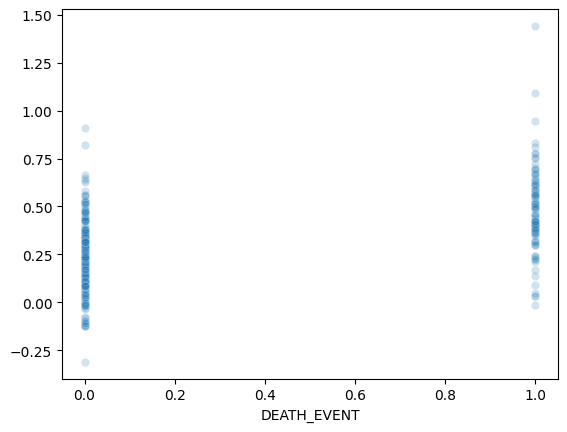

In [15]:
import seaborn as sns
sns.scatterplot(x=y,y=y_hat, alpha=.2) # typical for binary predictions

Partial Regression

In [16]:
vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT',]

for var in vars:
    df = df.loc[:,vars]
    y = df['DEATH_EVENT']
    x = df[var]
    X = df.drop( ['DEATH_EVENT',var], axis=1)

    # y regression
    model = LinearRegression().fit(X,y)
    y_hat = model.predict(X)
    r_y = y - y_hat

    # x regression
    model = LinearRegression().fit(X,x)
    x_hat = model.predict(X)
    r_x = x - x_hat

    # r_y on r_x:
    model = LinearRegression().fit(r_x.to_numpy().reshape(-1,1),r_y)
    print(f'{var} : {model.coef_}')

age : [0.00901227]
anaemia : [0.05487855]
creatinine_phosphokinase : [4.88013782e-05]
diabetes : [0.01663591]
ejection_fraction : [-0.01059109]
high_blood_pressure : [0.06795378]
platelets : [-7.21083687e-08]
serum_creatinine : [0.10632186]
serum_sodium : [-0.01096045]
sex : [-0.06255923]
smoking : [0.0134041]
DEATH_EVENT : [1.]


In [17]:
diabetes = pd.read_csv("/content/data/diabetes-dataset.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
vars = ['BloodPressure', 'BMI' 'Insulin', 'Outcome', 'SkinThickness',]
diabetes = diabetes.loc[:,vars]

y = diabetes['Outcome']
X = diabetes.drop(['Outcome '], axis=1)

mse = lambda y,y_hat: np.sum( (y-y_hat)**2 )/len(y)

model = LinearRegression().fit(X,y)
y_hat = model.predict(X)

print(f'Mean squared error:{mse(y,y_hat)}') # printing table...
print(f'Model intercept: {model.intercept_}')
pd.DataFrame({'variable':model.feature_names_in_, 'coefficient':model.coef_ })